# 成田智也(20241127)「但馬方言素材待遇形式の適用範囲」に付した図及び分析に使用したコード
コードには生成aiの提案したコードが含まれる

## ライブラリのインポート

## 図の生成コード

### 図1 2つの形式の異なる関数関係

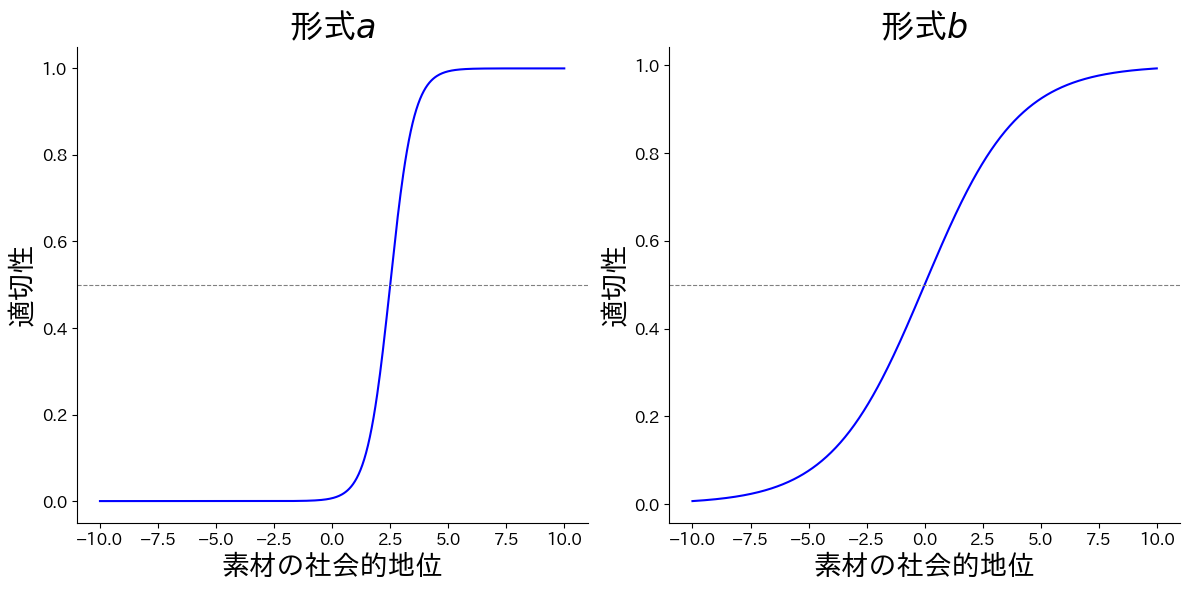

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

# Define the sigmoid function
def sigmoid(x, weight, bias):
    return 1 / (1 + np.exp(-(weight * x + bias)))

# Define the x range
x = np.linspace(-10, 10, 500)

# Define weights and biases for two sigmoid functions
params = [
    {"weight": 2, "bias": -5, "label": "形式$a$"},
    {"weight": 0.5, "bias": 0, "label": "形式$b$"},
]

# Plot the sigmoid functions side by side with modified grid and boundaries
plt.figure(figsize=(12, 6))

for i, param in enumerate(params, start=1):
    plt.subplot(1, 2, i)
    y = sigmoid(x, param["weight"], param["bias"])
    plt.plot(x, y, label=param["label"], color='blue')
    plt.axhline(0.5, color='gray', linestyle='--', linewidth=0.8, label="y = 0.5")
    plt.title(param["label"], fontsize=24)
    plt.xlabel("素材の社会的地位", fontsize=20)
    plt.ylabel("適切性", fontsize=20)
    plt.grid(visible=False)  # Turn off grid lines
    plt.gca().spines['top'].set_visible(False)  # Remove the top boundary
    plt.gca().spines['right'].set_visible(False)  # Remove the right boundary
    plt.tick_params(axis='both', which='major', labelsize=12)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### 図2 調査結果の概要

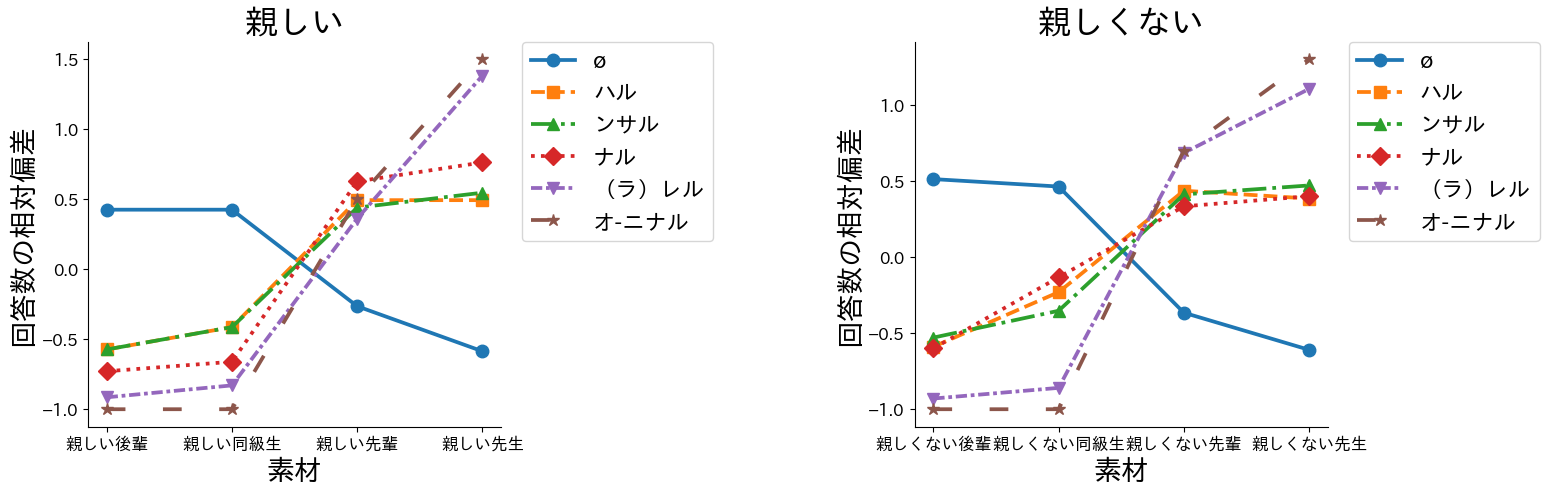

In [72]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import japanize_matplotlib

# Manually entering the data from the provided image into a DataFrame
data = {
    "素材": [['親しい後輩', '親しい同級生', '親しい先輩', '親しい先生'],['親しくない後輩', '親しくない同級生', '親しくない先輩', '親しくない先生']],
    'ø': [[31, 31, 16, 9],[31,30,13,8]],
    'ハル': [[8,11,28,28],[8,15,28,27]],
    'ンサル': [[8,11,27,29],[8,11,24,25]],
    'ナル': [[4,5,24,26],[6,13,20,21]],
    '（ラ）レル': [[1,2,16,28],[1,2,24,30]],
    'オ-ニナル': [[0,0,12,20],[0,0,17,23]],
}

Centered_data = copy.deepcopy(data)
for s in ['ø', 'ハル', 'ンサル', 'ナル', '（ラ）レル', 'オ-ニナル']:
    for t in range(len(data[s][0])):
        Centered_data[s][0][t] = (data[s][0][t] - np.mean(data[s][0])) / np.mean(data[s][0])
    for t in range(len(data[s][1])):
        Centered_data[s][1][t] = (data[s][1][t] - np.mean(data[s][1])) / np.mean(data[s][1])

df = pd.DataFrame(Centered_data)

# Defining different styles for lines and markers
line_styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 10))]
markers = ['o', 's', '^', 'D', 'v', '*']
# Plotting the data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
plt.subplots_adjust(wspace=1)

# Plotting for the '親しい' group with different dashed and dotted styles
for i, col in enumerate(['ø', 'ハル', 'ンサル', 'ナル', '（ラ）レル', 'オ-ニナル']):
    ax1.plot(df['素材'][0], df[col][0], linestyle=line_styles[i], marker=markers[i], linewidth=2.7, markersize=9, label=col)

# Adding titles and labels
ax1.set_title('親しい', fontsize=24)
ax1.set_xlabel('素材', fontsize=20)
ax1.set_ylabel('回答数の相対偏差', fontsize=20)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(False)
ax1.tick_params(axis='both', which='major', labelsize=12)

# Plotting for the '親しくない' group with different dashed and dotted styles
for i, col in enumerate(['ø', 'ハル', 'ンサル', 'ナル', '（ラ）レル', 'オ-ニナル']):
    ax2.plot(df['素材'][1], df[col][1], linestyle=line_styles[i], marker=markers[i], linewidth=2.7, markersize=9, label=col)

# Adding titles and labels
ax2.set_title('親しくない', fontsize=24)
ax2.set_xlabel('素材', fontsize=20)
ax2.set_ylabel('回答数の相対偏差', fontsize=20)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(False)
ax2.tick_params(axis='both', which='major', labelsize=12)

# Display the plot
plt.show()

### 図3 適切性曲線と閾値の分布

#### 1.データの前処理

In [7]:
import pandas as pd

# ファイルパスを指定
file_path = 'honorifics20240929.csv'

# CSVファイルを読み込んで変数に格納
df = pd.read_csv(file_path)


# 1. nの数に基づいて (y, power, intimacy) 配列を生成する
expanded_data = []
for _, row in df.iterrows():
    n_value = row['n']
    y_value = row['y']
    power_value = row['power']
    intimacy_value = row['intimacy']

    # n_valueの数だけ (y, power, intimacy) のタプルを追加
    if n_value > 0:
        for _ in range(n_value):
            expanded_data.append([y_value, power_value, intimacy_value])

# 生成された配列をDataFrameに変換
expanded_df = pd.DataFrame(expanded_data, columns=['y', 'power', 'intimacy'])

# 入力列と出力列に分ける
y_df = expanded_df[['y']]  # y列のみ抽出
X_df = expanded_df[['power', 'intimacy']]  # powerとintimacy列を抽出

# y, power, intimacy をそれぞれダミー化する
y_dummy = pd.get_dummies(y_df, columns=['y'])  # y列をダミー化
X_dummy = pd.get_dummies(X_df, columns=['power', 'intimacy'])  # powerとintimacy列をダミー化

# ダミー化されたy列とX列をそれぞれNumPy配列に変換
y = y_dummy.values  # ダミー化されたy列をNumPy配列に変換
X = X_dummy.values  # ダミー化されたX列をNumPy配列に変換

print("yの形状:", y)
print("Xの形状:", X)

yの形状: [[ True False False False False False]
 [ True False False False False False]
 [ True False False False False False]
 ...
 [False False False False  True False]
 [False False False False  True False]
 [False False False False  True False]]
Xの形状: [[False False False  True False  True]
 [False False False  True False  True]
 [False False False  True False  True]
 ...
 [False False  True False  True False]
 [False False  True False  True False]
 [False False  True False  True False]]


#### 2.モデルの構築・訓練

In [16]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Input, Dense, Lambda
from tensorflow.keras.models import Model
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Softmax
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import japanize_matplotlib
from tensorflow.keras.layers import Layer
from tensorflow.keras.constraints import Constraint
import tensorflow.keras.backend as K

# 特定のインデックスにのみ正の制約を適用するカスタム制約クラス
class SelectivePositiveConstraint(Constraint):
    def __init__(self, indices):
        self.indices = indices  # 制約を適用する重みのインデックスを指定

    def __call__(self, w):
        # 重みが2次元のテンソルであることを想定
        mask = tf.constant([[1 if i in self.indices else 0] for i in range(w.shape[0])], dtype=w.dtype)
        return w * (1 - mask) + tf.maximum(w, 0.0) * mask

# カスタムレイヤーで特定の接続パターンを定義
class CustomDenseLayer(Layer):
    def __init__(self, units, **kwargs):
        super(CustomDenseLayer, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        # 1番目の隠れ層のニューロンに対して、1~4番目の入力層のニューロンが接続
        # 4番目の重みに制約を適用
        self.kernel_1 = self.add_weight(shape=(4, 1),
                                        initializer='random_normal',
                                        trainable=True,
                                        constraint=SelectivePositiveConstraint(indices=[2,3]))
        
        # 2番目の隠れ層のニューロンに対して、4,5番目の入力層のニューロンが接続
        # 5番目の重みに正の制約を適用
        self.kernel_2 = self.add_weight(shape=(2, 1),
                                        initializer='random_normal',
                                        trainable=True,
                                        constraint=SelectivePositiveConstraint(indices=[0]))

        self.bias = self.add_weight(shape=(self.units,),
                                    initializer='zeros',
                                    trainable=True)

    def call(self, inputs):
        # 1~4番目の入力を1番目の隠れ層のニューロンに接続
        hidden_1 = tf.matmul(inputs[:, :4], self.kernel_1) + self.bias[0]
        
        # 4,5番目の入力を2番目の隠れ層のニューロンに接続
        hidden_2 = tf.matmul(inputs[:, 4:6], self.kernel_2) + self.bias[1]
        
        # 結果を結合して返す
        return tf.concat([hidden_1, hidden_2], axis=1)

# データをシャッフル
indices = np.random.permutation(len(X))
X = X[indices]
y = y[indices]

# 2. KFoldの設定
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# 3. 複数回のk分割交差検証
num_iterations = 25  # 交差検証の回数
all_train_losses = []  # 各エポックの訓練損失を保存するリスト
all_val_losses = []  # 各エポックの検証損失を保存するリスト
all_first_layer_weights = []  # 1層目の重みを保存するリスト
all_second_layer_weights = []  # 2層目の重みを保存するリスト

for iteration in range(num_iterations):
    fold_f1_scores = []
    print(f"Iteration {iteration + 1}/{num_iterations}")

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # 4. モデルの設計
        model = Sequential()
        model.add(tf.keras.Input(shape=(6,)))  # 入力層の形状を指定
        model.add(CustomDenseLayer(units=2))    # カスタム隠れ層を追加
        model.add(Dense(6, activation='sigmoid'))
        model.add(Softmax())

        #事前に重みを設定
        initial_biases = model.layers[0].get_weights()[2]
        model.layers[0].set_weights(
            [np.array([[-1],[0],[1],[2]]),#powerの重み（後輩、同級生、先輩、先生）
             np.array([[-2],[2]]),#Intimacyの重み（親しくない、親しい）
             initial_biases#バイアス（特に設定せず、乱数のままにしておく）
            ])

        # 5. モデルのコンパイル
        model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy')

        # 6. モデルのトレーニング
        history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val), verbose=0)

        # 各エポックの損失を記録
        all_train_losses.append(history.history['loss'])
        all_val_losses.append(history.history['val_loss'])

        # 1層目の重みを取得
        first_layer_weights = model.layers[0].get_weights()  # 重みを取得（バイアスは[1]）
        all_first_layer_weights.append(first_layer_weights)
        
        # 2層目の重みを取得
        second_layer_weights = model.layers[1].get_weights()  # 重みを取得（バイアスは[1]）
        all_second_layer_weights.append(second_layer_weights)

        # 7. 検証データでの予測
        y_val_pred = model.predict(X_val)
        y_val_pred_classes = np.argmax(y_val_pred, axis=1)  # 予測結果をクラスに変換
        y_val_true_classes = np.argmax(y_val, axis=1)  # 真のラベルをクラスに変換

Iteration 1/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Iteration 2/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Iteration 3/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Iteration 4/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Iteration 5/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Iteration 6/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/ste

#### 3.損失の推移

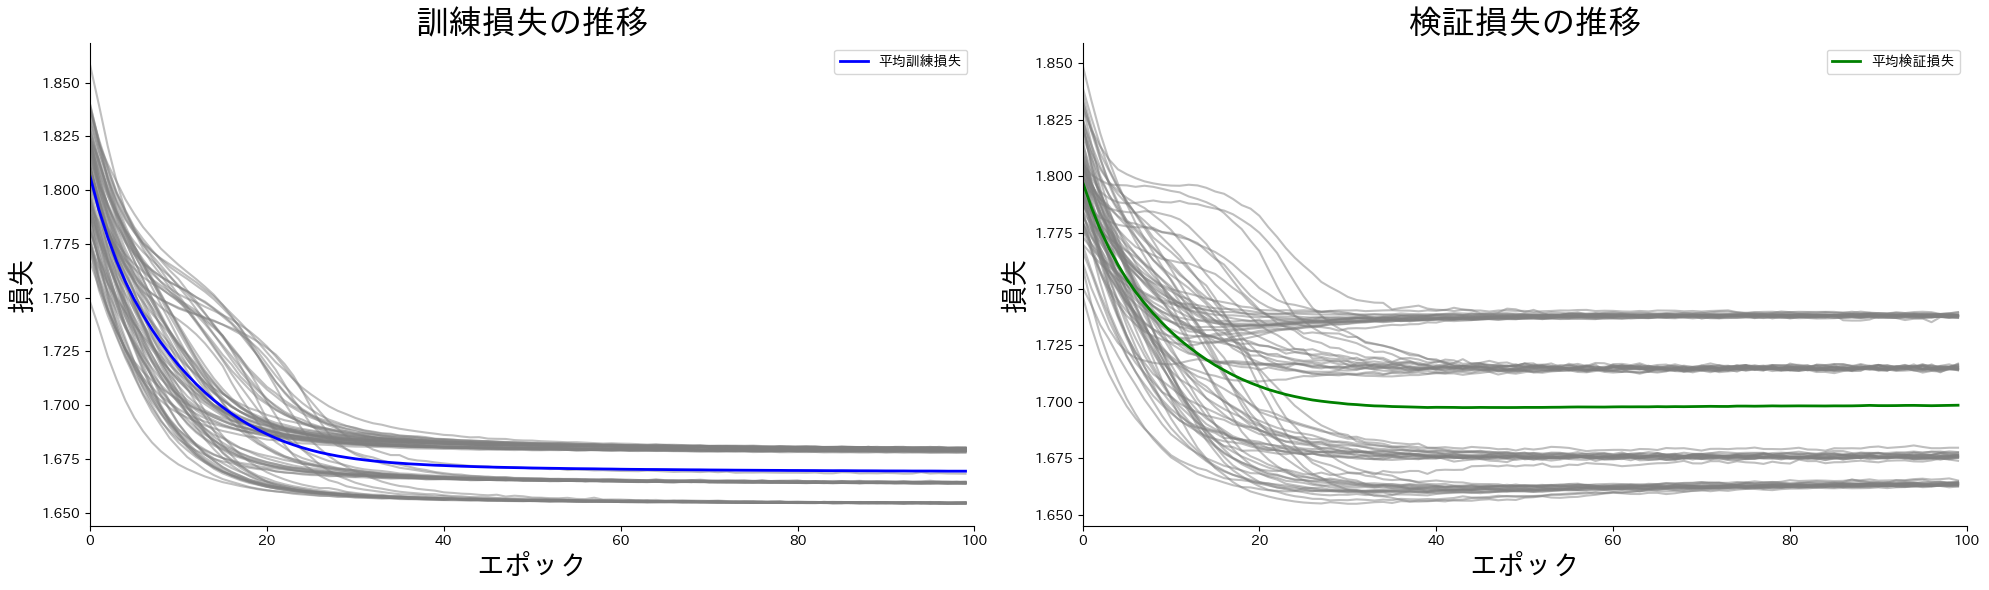

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# 図全体の大きさを設定して、横に2つのプロットを作成
fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # 横に2つ並べる (1行2列)

# 訓練損失の推移をプロット（左側のプロット）
for i in range(num_iterations*3):
    axes[0].plot(all_train_losses[i], color='gray', alpha=0.5)  # フォールドの損失をグレーで表示

# 平均訓練損失を計算してプロット
mean_train_losses = np.mean(all_train_losses, axis=0)  # 各エポックの平均損失
axes[0].plot(mean_train_losses, color='blue', linewidth=2, label='平均訓練損失')  # 濃い色で平均損失を表示

# 訓練損失プロットの装飾
axes[0].set_title('訓練損失の推移',fontsize=24)
axes[0].set_xlabel('エポック',fontsize=20)
axes[0].set_ylabel('損失',fontsize=20)
axes[0].set_xlim(0,100)
axes[0].legend(loc='upper right')
axes[0].grid(False)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# 検証損失の推移をプロット（右側のプロット）
for i in range(num_iterations*3):
    axes[1].plot(all_val_losses[i], color='gray', alpha=0.5)  # フォールドの損失をグレーで表示

# 平均検証損失を計算してプロット
mean_val_losses = np.mean(all_val_losses, axis=0)  # 各エポックの平均損失
axes[1].plot(mean_val_losses, color='green', linewidth=2, label='平均検証損失')  # 濃い色で平均損失を表示

# 検証損失プロットの装飾
axes[1].set_title('検証損失の推移',fontsize=24)
axes[1].set_xlabel('エポック',fontsize=20)
axes[1].set_ylabel('損失',fontsize=20)
axes[1].set_xlim(0,100)
axes[1].legend(loc='upper right')
axes[1].grid(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# 図全体を表示
plt.tight_layout()  # レイアウトの調整
plt.show()

#### 4.重みの分布

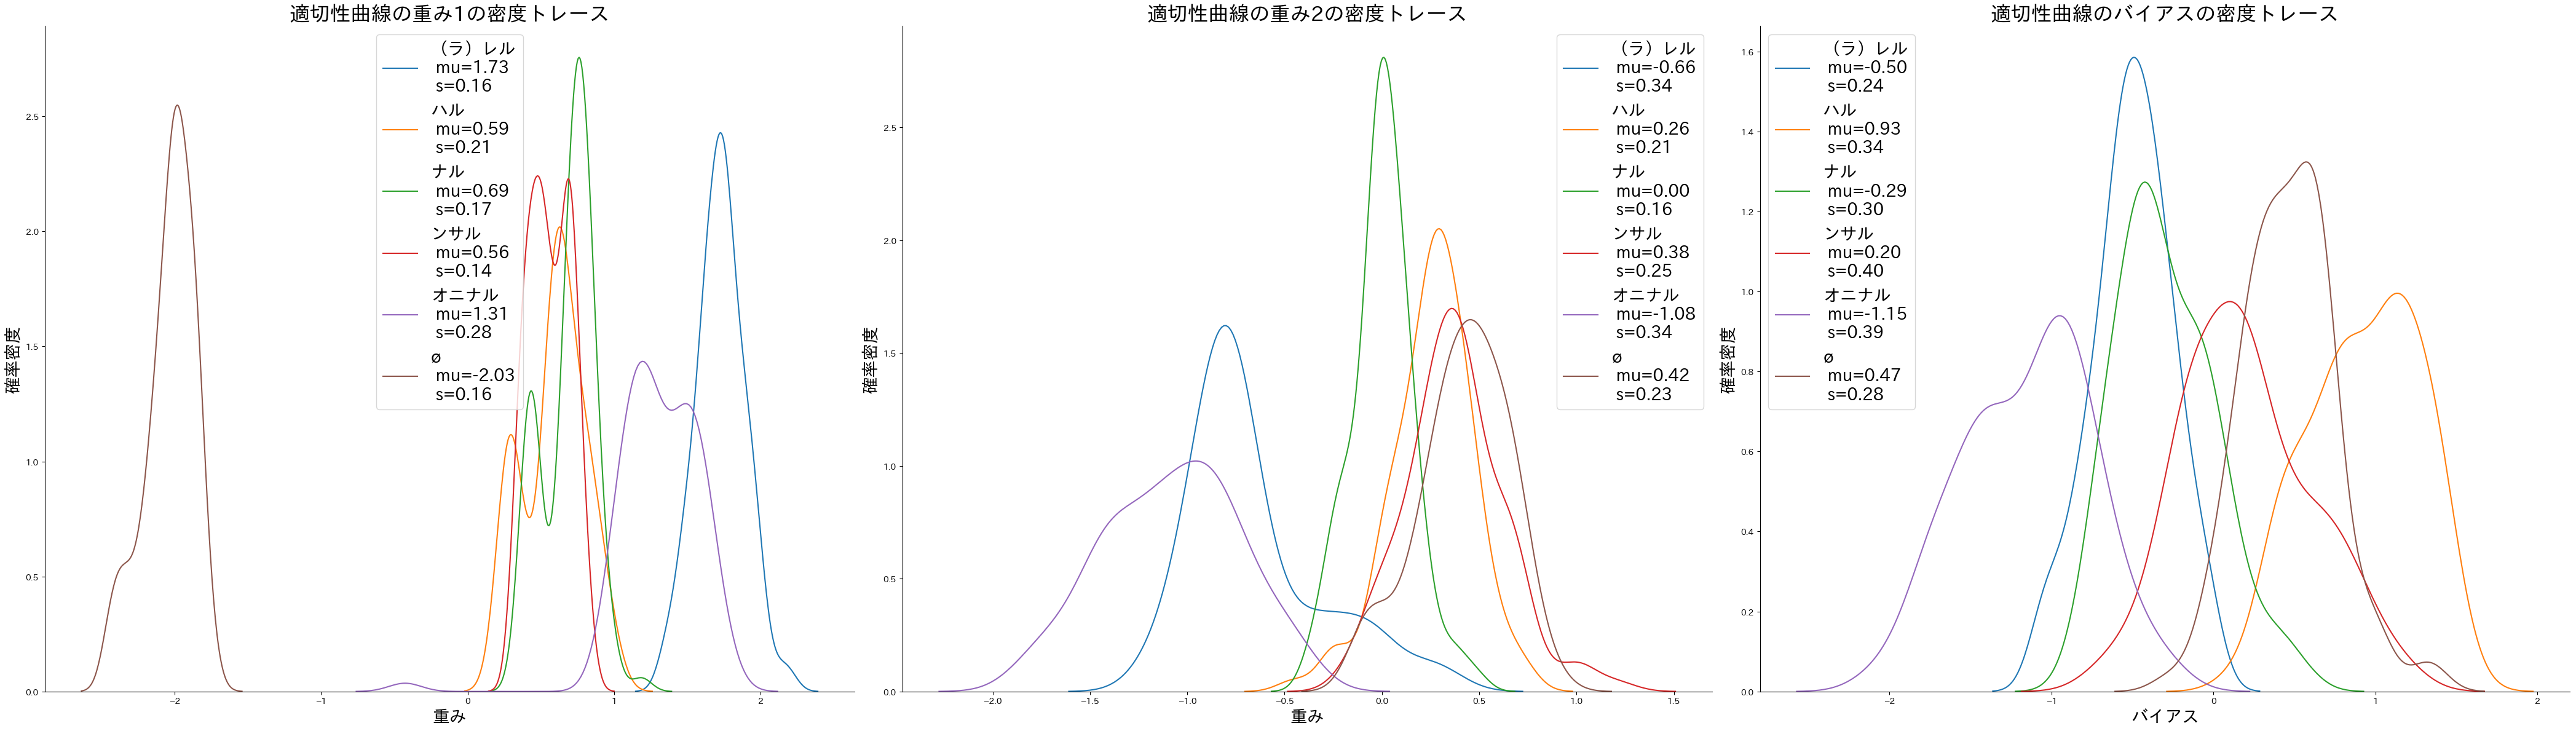

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import japanize_matplotlib

weights = [[],[]]
biases_1 = []
# 重みとバイアスに分離
for s in range(len(all_second_layer_weights)):
  weights[0].append(all_second_layer_weights[s][0][0])
  weights[1].append(all_second_layer_weights[s][0][1])
  biases_1.append(all_second_layer_weights[s][1])

# 重みとバイアスの平均値を計算
mean_weights = np.mean(weights, axis=1)
mean_biases_1 = np.mean(biases_1, axis=0)

# 重みとバイアスの分散を計算
std_weights = np.std(weights, axis=1)
std_biases_1 = np.std(biases_1, axis=0)

# 3つのサブプロットを横に並べる
fig, axes = plt.subplots(1, 3, figsize=(42, 12))

# サブプロット0: 重み1の密度トレース
labels = ["（ラ）レル", "ハル", "ナル", "ンサル", "オニナル", "ø"]
peak_w_1 = []
for s in range(len(np.array(weights[0]).T)):
  sns_kde = sns.kdeplot(np.array(weights[0]).T[s], ax=axes[0], label=f'{labels[s]}\n mu={mean_weights[0][s]:.2f}\n s={std_weights[0][s]:.2f}', bw_adjust=1, fill=False)
  peak_index = np.argmax(sns_kde.lines[s].get_ydata())
  peak_w_1.append(sns_kde.lines[s].get_xdata()[peak_index])

# グラフの装飾
axes[0].set_title('適切性曲線の重み1の密度トレース',fontsize=24)
axes[0].set_xlabel('重み',fontsize=20)
axes[0].set_ylabel('確率密度',fontsize=20)
axes[0].legend(fontsize=20)
axes[0].grid(False)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# サブプロット1: 重み2の密度トレース
peak_w_2 = []
for s in range(len(np.array(weights[1]).T)):
  sns_kde = sns.kdeplot(np.array(weights[1]).T[s], ax=axes[1], label=f'{labels[s]}\n mu={mean_weights[1][s]:.2f}\n s={std_weights[1][s]:.2f}', bw_adjust=1, fill=False)
  peak_index = np.argmax(sns_kde.lines[s].get_ydata())
  peak_w_2.append(sns_kde.lines[s].get_xdata()[peak_index])

# グラフの装飾
axes[1].set_title('適切性曲線の重み2の密度トレース',fontsize=24)
axes[1].set_xlabel('重み',fontsize=20)
axes[1].set_ylabel('確率密度',fontsize=20)
axes[1].legend(fontsize=20)
axes[1].grid(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# サブプロット2: バイアスの密度トレース
peak_b = []
for s in range(len(np.array(biases_1).T)):
  sns_kde = sns.kdeplot(np.array(biases_1).T[s], ax=axes[2], label=f'{labels[s]}\n mu={mean_biases_1[s]:.2f}\n s={std_biases_1[s]:.2f}', bw_adjust=1, fill=False)
  peak_index = np.argmax(sns_kde.lines[s].get_ydata())
  peak_b.append(sns_kde.lines[s].get_xdata()[peak_index])

# グラフの装飾
axes[2].set_title('適切性曲線のバイアスの密度トレース',fontsize=24)
axes[2].set_xlabel('バイアス',fontsize=20)
axes[2].set_ylabel('確率密度',fontsize=20)
axes[2].legend(fontsize=20)
axes[2].grid(False)
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)

# グラフを表示
plt.tight_layout()
plt.show()


#### 5.適切性曲線と閾値の分布

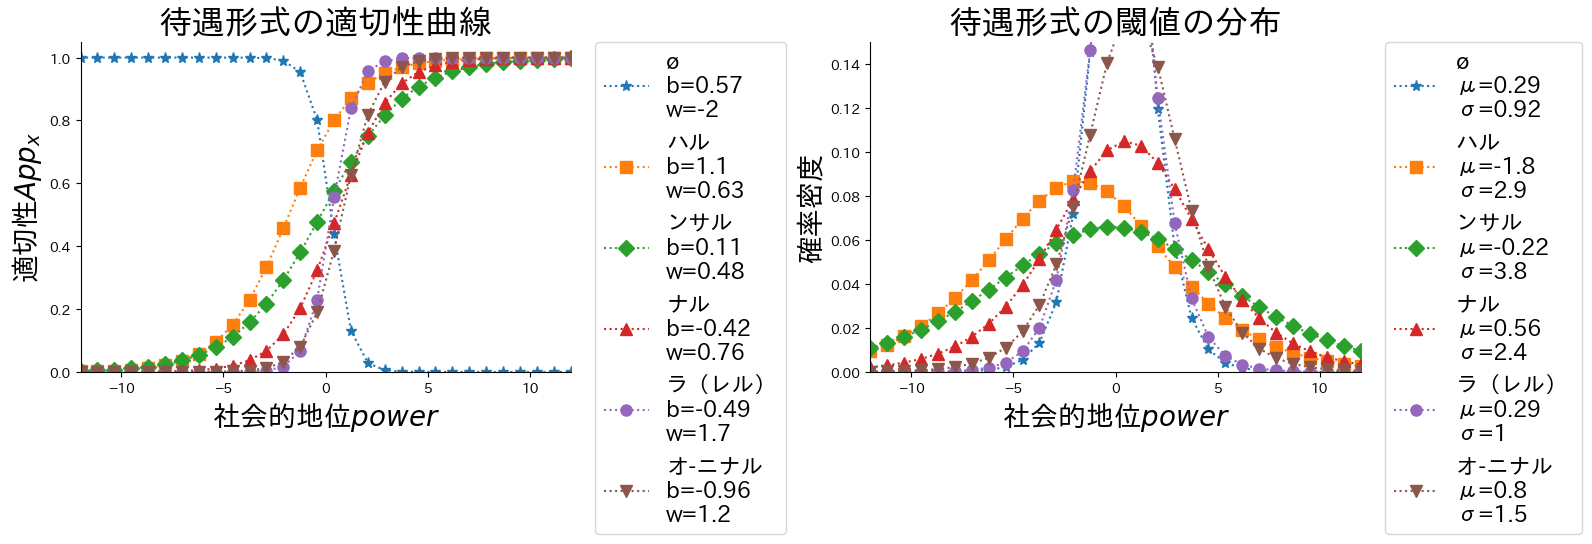

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import math

weights_typical = peak_w_1
biases_1_typical = peak_b
sorted_indices = np.argsort(peak_b)[::-1]

# シグモイド関数の定義
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ロジスティック分布の定義
def logistic_pdf(x, mu, s):
    exponent = -(x - mu) / s
    return np.exp(exponent) / (s * (1 + np.exp(exponent)) ** 2)

# グラフにプロット
plot_scale = 12
x_values = np.linspace(-plot_scale, plot_scale, 30)

# シグモイド曲線を計算
logistic_curves_sigmoid = []
for i in range(len(weights_typical)):
    logistic_curves_sigmoid.append(sigmoid(x_values * weights_typical[i] + biases_1_typical[i]))

# ロジスティック分布を計算
logistic_curves_pdf = []
for i in range(len(weights_typical)):
    mu = -biases_1_typical[i] / weights_typical[i]
    s = math.sqrt(np.pi**2 / (3 * weights_typical[i]**2))
    logistic_curves_pdf.append(abs(logistic_pdf(x_values, mu, s)))

# プロットを横並びに表示
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
plt.subplots_adjust(wspace=0.8)

# 左側: シグモイド曲線のプロット
form = ["ラ（レル）", "ハル", "ナル", "ンサル", "オ-ニナル", "ø"]
marker = ['o', 's', '^', 'D', 'v', '*']
for i in [5,1,3,2,0,4]:
  axs[0].plot(x_values, logistic_curves_sigmoid[i], marker = marker[i], label=f'{form[i]}\nb={biases_1_typical[i]:.2g} \nw={weights_typical[i]:.2g}', linestyle=':', markersize=8)
axs[0].set_title('待遇形式の適切性曲線',fontsize=24)
axs[0].set_xlabel(r'社会的地位$power$',fontsize=20)
axs[0].set_ylabel(r'適切性$App_x$',fontsize=20)
axs[0].set_xlim(-plot_scale, plot_scale)
axs[0].set_ylim(0,1.05)
axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
axs[0].grid(False)
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

# 右側: ロジスティック分布のプロット
for i in [5,1,3,2,0,4]:
    mu = -biases_1_typical[i] / weights_typical[i]
    s = math.sqrt(np.pi**2 / (3 * weights_typical[i]**2))
    axs[1].plot(x_values,logistic_curves_pdf[i], marker = marker[i], label=f'{form[i]} \nμ={mu:.2g} \nσ={s:.2g}', linestyle=':', markersize=8)
axs[1].set_title('待遇形式の閾値の分布',fontsize=24)
axs[1].set_xlabel(r'社会的地位$power$',fontsize=20)
axs[1].set_ylabel(r'確率密度',fontsize=20)
axs[1].set_xlim(-plot_scale, plot_scale)
axs[1].set_ylim(0,0.15)
axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
axs[1].grid(False)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

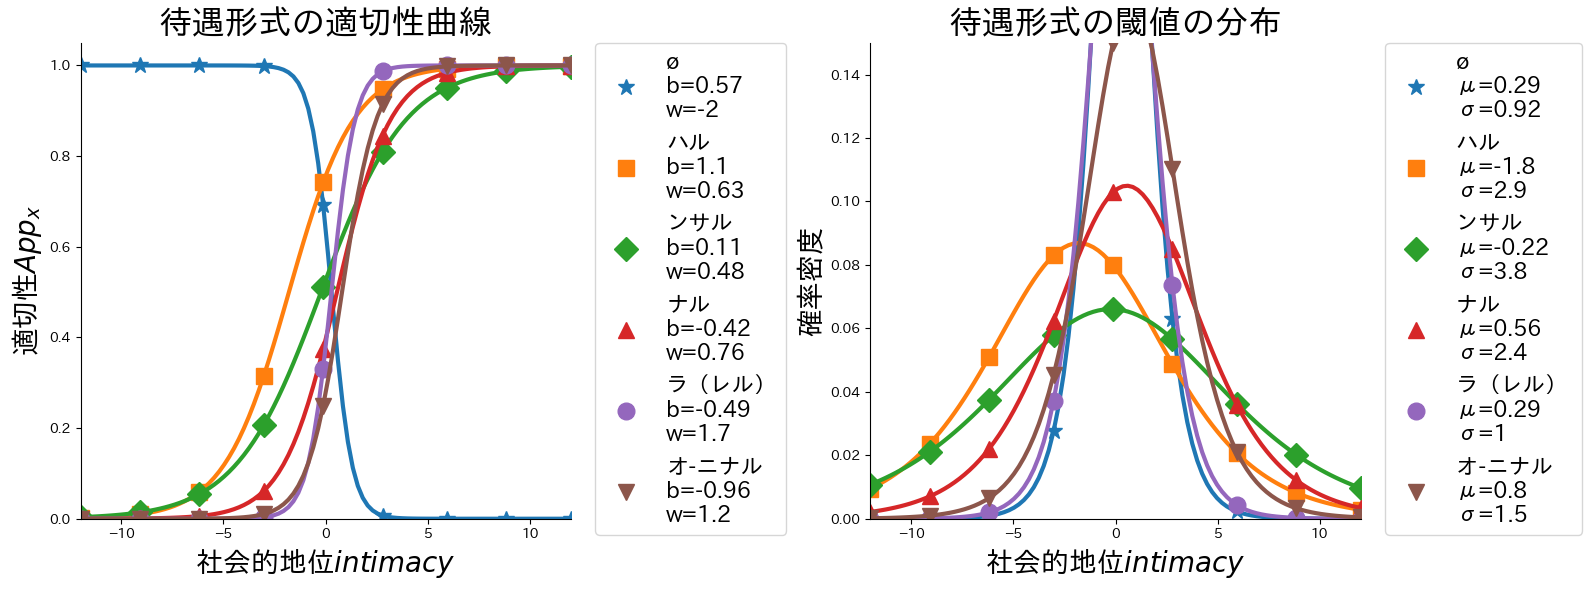

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import math

weights_typical = peak_w_1
biases_1_typical = peak_b
sorted_indices = np.argsort(peak_b)[::-1]

# シグモイド関数の定義
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ロジスティック分布の定義
def logistic_pdf(x, mu, s):
    exponent = -(x - mu) / s
    return np.exp(exponent) / (s * (1 + np.exp(exponent)) ** 2)

# グラフにプロット
plot_scale = 12
x_values = np.linspace(-plot_scale, plot_scale, 100)  # 曲線は100分割
marker_indices = np.linspace(0, len(x_values) - 1, 9, dtype=int)  # マーカー用インデックスを10個に絞る
# シグモイド曲線を計算
logistic_curves_sigmoid = []
for i in range(len(weights_typical)):
    logistic_curves_sigmoid.append(sigmoid(x_values * weights_typical[i] + biases_1_typical[i]))

# ロジスティック分布を計算
logistic_curves_pdf = []
for i in range(len(weights_typical)):
    mu = -biases_1_typical[i] / weights_typical[i]
    s = math.sqrt(np.pi**2 / (3 * weights_typical[i]**2))
    logistic_curves_pdf.append(abs(logistic_pdf(x_values, mu, s)))

# プロットを横並びに表示
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
plt.subplots_adjust(wspace=0.8)

# 左側: シグモイド曲線のプロット
form = ["ラ（レル）", "ハル", "ナル", "ンサル", "オ-ニナル", "ø"]
marker = ['o', 's', '^', 'D', 'v', '*']
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
for idx, i in enumerate([5,1,3,2,0,4]):
    color = colors[idx % len(colors)]
    axs[0].plot(x_values, logistic_curves_sigmoid[i], linestyle='-',linewidth=3, color=color)
    axs[0].plot(x_values[marker_indices], logistic_curves_sigmoid[i][marker_indices], marker=marker[i], linestyle='', markersize=12, linewidth=1, label=f'{form[i]}\nb={biases_1_typical[i]:.2g} \nw={weights_typical[i]:.2g}', color=color)
axs[0].set_title('待遇形式の適切性曲線',fontsize=24)
axs[0].set_xlabel(r'社会的地位$intimacy$',fontsize=20)
axs[0].set_ylabel(r'適切性$App_x$',fontsize=20)
axs[0].set_xlim(-plot_scale, plot_scale)
axs[0].set_ylim(0,1.05)
axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
axs[0].grid(False)
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

# 右側: ロジスティック分布のプロット
for idx, i in enumerate([5, 1, 3, 2, 0, 4]):
    color = colors[idx % len(colors)]
    mu = -biases_1_typical[i] / weights_typical[i]
    s = math.sqrt(np.pi**2 / (3 * weights_typical[i]**2))
    axs[1].plot(x_values, logistic_curves_pdf[i],linestyle='-',linewidth=3, color=color)
    axs[1].plot(x_values[marker_indices], logistic_curves_pdf[i][marker_indices], marker=marker[i], linestyle='', markersize=12, linewidth=1, label=f'{form[i]} \nμ={mu:.2g} \nσ={s:.2g}',color=color)
axs[1].set_title('待遇形式の閾値の分布',fontsize=24)
axs[1].set_xlabel(r'社会的地位$intimacy$',fontsize=20)
axs[1].set_ylabel(r'確率密度',fontsize=20)
axs[1].set_xlim(-plot_scale, plot_scale)
axs[1].set_ylim(0,0.15)
axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
axs[1].grid(False)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

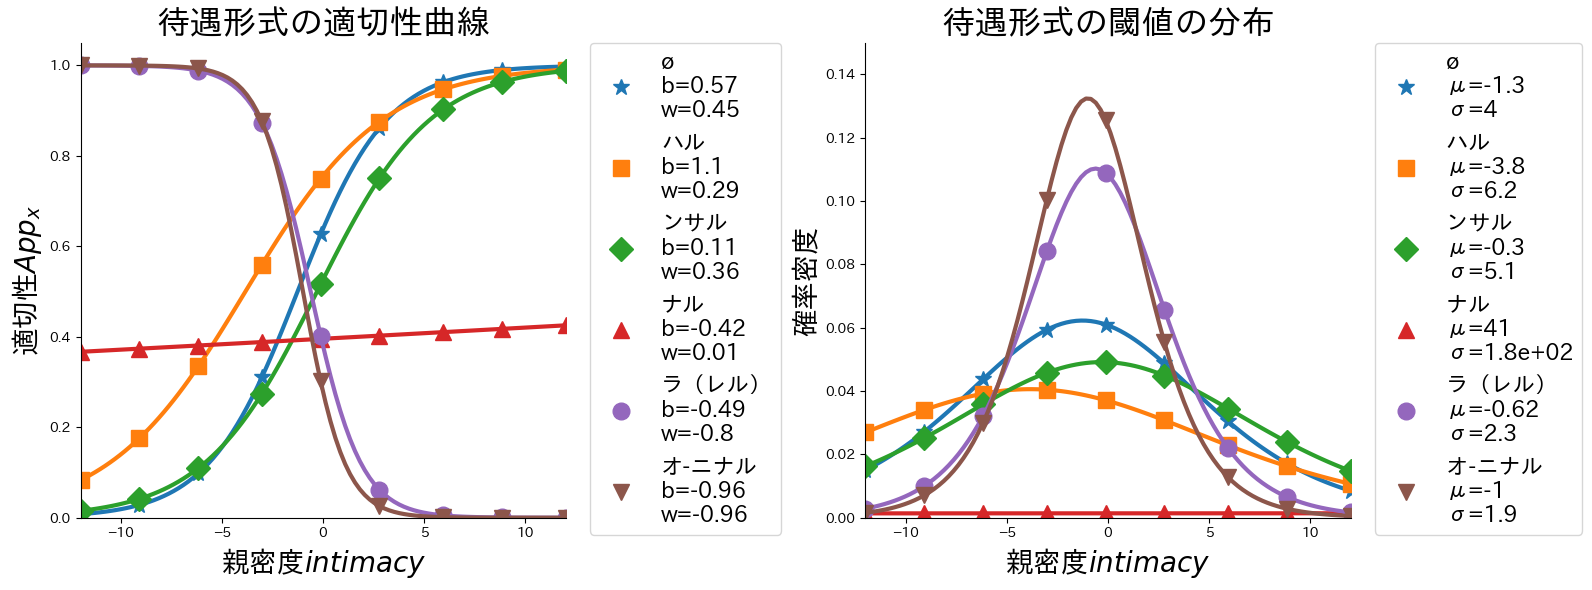

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import math

weights_typical = peak_w_2
biases_1_typical = peak_b
sorted_indices = np.argsort(peak_b)[::-1]

# シグモイド関数の定義
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ロジスティック分布の定義
def logistic_pdf(x, mu, s):
    exponent = -(x - mu) / s
    return np.exp(exponent) / (s * (1 + np.exp(exponent)) ** 2)

# グラフにプロット
plot_scale = 12
x_values = np.linspace(-plot_scale, plot_scale, 100)  # 曲線は100分割
marker_indices = np.linspace(0, len(x_values) - 1, 9, dtype=int)  # マーカー用インデックスを10個に絞る
# シグモイド曲線を計算
logistic_curves_sigmoid = []
for i in range(len(weights_typical)):
    logistic_curves_sigmoid.append(sigmoid(x_values * weights_typical[i] + biases_1_typical[i]))

# ロジスティック分布を計算
logistic_curves_pdf = []
for i in range(len(weights_typical)):
    mu = -biases_1_typical[i] / weights_typical[i]
    s = math.sqrt(np.pi**2 / (3 * weights_typical[i]**2))
    logistic_curves_pdf.append(abs(logistic_pdf(x_values, mu, s)))

# プロットを横並びに表示
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
plt.subplots_adjust(wspace=0.8)

# 左側: シグモイド曲線のプロット
form = ["ラ（レル）", "ハル", "ナル", "ンサル", "オ-ニナル", "ø"]
marker = ['o', 's', '^', 'D', 'v', '*']
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
for idx, i in enumerate([5,1,3,2,0,4]):
    color = colors[idx % len(colors)]
    axs[0].plot(x_values, logistic_curves_sigmoid[i], linestyle='-',linewidth=3, color=color)
    axs[0].plot(x_values[marker_indices], logistic_curves_sigmoid[i][marker_indices], marker=marker[i], linestyle='', markersize=12, linewidth=1, label=f'{form[i]}\nb={biases_1_typical[i]:.2g} \nw={weights_typical[i]:.2g}', color=color)
axs[0].set_title('待遇形式の適切性曲線',fontsize=24)
axs[0].set_xlabel(r'親密度$intimacy$',fontsize=20)
axs[0].set_ylabel(r'適切性$App_x$',fontsize=20)
axs[0].set_xlim(-plot_scale, plot_scale)
axs[0].set_ylim(0,1.05)
axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
axs[0].grid(False)
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

# 右側: ロジスティック分布のプロット
for idx, i in enumerate([5, 1, 3, 2, 0, 4]):
    color = colors[idx % len(colors)]
    mu = -biases_1_typical[i] / weights_typical[i]
    s = math.sqrt(np.pi**2 / (3 * weights_typical[i]**2))
    axs[1].plot(x_values, logistic_curves_pdf[i],linestyle='-',linewidth=3, color=color)
    axs[1].plot(x_values[marker_indices], logistic_curves_pdf[i][marker_indices], marker=marker[i], linestyle='', markersize=12, linewidth=1, label=f'{form[i]} \nμ={mu:.2g} \nσ={s:.2g}',color=color)
axs[1].set_title('待遇形式の閾値の分布',fontsize=24)
axs[1].set_xlabel(r'親密度$intimacy$',fontsize=20)
axs[1].set_ylabel(r'確率密度',fontsize=20)
axs[1].set_xlim(-plot_scale, plot_scale)
axs[1].set_ylim(0,0.15)
axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
axs[1].grid(False)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()